# Multiple Linear Regression Project
## Dhivya Murugesan

### Predicting the Housing Prices
If you’re looking to buy a new house or sell your house, you need an estimate on how much your property is worth.

Lets guess the factors that affects the Housing Prices
- Location
- Supply and demand
- Economic growth
- Size and facilities
- Flooring
- Demographics

The features and overall size of a property will also influence its worth. A four-bedroom house is likely to fetch more than a two-bedroom house in the same area, while features such as extra bathrooms, garages, swimming pools and outdoor entertaining areas can all have an impact on property value. In busy cities, the absence or abundance of parking opportunities is another critical factor, while the functionality of a home’s layout is always important.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li>Understanding the Data</li>
        <li>Reading the data in</li>
        <li>Data Exploration</li>
        <li>Multi Regression Model</li>
    </ol>
</div>
<br>
<hr>

# Importing Needed Packages

In [5]:
# The code was removed by Watson Studio for sharing.

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


# Understanding the Data

## Dataset 
We have downloaded a Toronto housing prices dataset, **`HousePrices.csv`**, from kaggle. Lets explore this dataset.

## Size: House Prices
Attributes: 16 ---
Observations: 500,000

## Macro Factors Affecting the House Prices

- Area        (Range: 1 - 249)  in 1000sqft.                             
- Garage	  (Range: 1 - 3)
- FirePlace   (Range: 0 - 4)
- Baths	      (Range: 1 - 5)
- White Marble (Binary)
- Black Marble	(Binary)
- Indian Marble(Binary)
- Floors (Binary)
- City (Range: 1 -3)
- Solar	(Binary)
- Electric (Binary)
- Fiber (Binary)
- Glass Doors (Binary)
- Swimming Pool	(Binary)
- Garden (Binary)
- ### Prices - This is my Target (Range: 7725 - 77975)


# Reading the Data

In [4]:
dataset.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

### Checking for missing values

In [4]:
dataset.apply(lambda x: sum(x.isnull()))

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [5]:
dataset.apply(lambda x: len(x.unique()))

Area              249
Garage              3
FirePlace           5
Baths               5
White Marble        2
Black Marble        2
Indian Marble       2
Floors              2
City                3
Solar               2
Electric            2
Fiber               2
Glass Doors         2
Swiming Pool        2
Garden              2
Prices           2714
dtype: int64

In [6]:
dataset.dtypes

Area             int64
Garage           int64
FirePlace        int64
Baths            int64
White Marble     int64
Black Marble     int64
Indian Marble    int64
Floors           int64
City             int64
Solar            int64
Electric         int64
Fiber            int64
Glass Doors      int64
Swiming Pool     int64
Garden           int64
Prices           int64
dtype: object

### Correlation

In [7]:
dataset.corr()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000897,0.000374,-0.000398,0.002525,-0.001477,-0.001047,-0.000776,-0.003455,0.000526,-0.000128,0.000114,-0.001230,0.000610,0.001428,0.147717
Garage,-0.000897,1.000000,0.001307,-0.003647,0.000541,0.001847,-0.002385,-0.000931,0.000793,0.001480,0.000779,-0.000562,-0.002171,0.001088,-0.000669,0.100294
FirePlace,0.000374,0.001307,1.000000,0.000643,0.000952,-0.000922,-0.000030,0.000185,-0.000211,-0.000309,0.001342,0.001818,-0.000366,0.001295,0.000231,0.089139
Baths,-0.000398,-0.003647,0.000643,1.000000,0.002493,-0.002739,0.000246,-0.000880,-0.000858,-0.000755,0.001047,-0.000687,-0.001668,0.002212,0.001723,0.145087
White Marble,0.002525,0.000541,0.000952,0.002493,1.000000,-0.498893,-0.500723,0.000078,-0.000861,-0.001583,0.000558,-0.000576,-0.000402,-0.001898,0.000959,0.448154
Black Marble,-0.001477,0.001847,-0.000922,-0.002739,-0.498893,1.000000,-0.500383,-0.000368,-0.000324,0.001764,-0.000549,0.000073,0.000086,0.000713,0.000133,-0.078049
Indian Marble,-0.001047,-0.002385,-0.000030,0.000246,-0.500723,-0.500383,1.000000,0.000289,0.001184,-0.000180,-0.000010,0.000503,0.000316,0.001184,-0.001091,-0.369756
Floors,-0.000776,-0.000931,0.000185,-0.000880,0.000078,-0.000368,0.000289,1.000000,-0.000641,-0.002651,0.000082,0.001373,-0.000008,-0.000211,-0.000492,0.619451
City,-0.003455,0.000793,-0.000211,-0.000858,-0.000861,-0.000324,0.001184,-0.000641,1.000000,0.000488,0.000788,-0.002716,0.000770,0.000322,0.001207,0.233259
Solar,0.000526,0.001480,-0.000309,-0.000755,-0.001583,0.001764,-0.000180,-0.002651,0.000488,1.000000,0.001883,0.000238,-0.000817,-0.000466,-0.004263,0.008429


## The attributes with weak correlation index with Target variables are: 
- Garden vs Price - 0.001540
- Swimming Pool vs Price - 0.001787
- Solar vs Price - 0.008429

## The attributes with negative correlation index with Target variables are:
- Black Marble vs Price - -0.078049
- Indian Marble vs Price - -0.369756

## The attributes with strong correlation index with Target variables are: 
- Floors vs Price - 0.619451
- Fibre vs Price - 0.484626
- White Marble - 0.448154

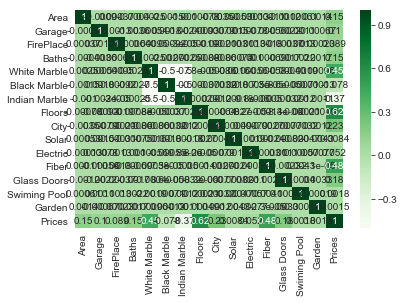

In [8]:
#Correlation between the variables are analysed using Heatmap. But heatmap doesn't look legible with Jupyter.
import seaborn as sns
sns.set_style("whitegrid")
sns.heatmap(dataset.corr(), xticklabels=dataset.columns, yticklabels=dataset.columns,
            linecolor="black",annot=True, cmap='Greens', square=False)


## Data Visualisation

Lets plot each variable against the price to see the relationship

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


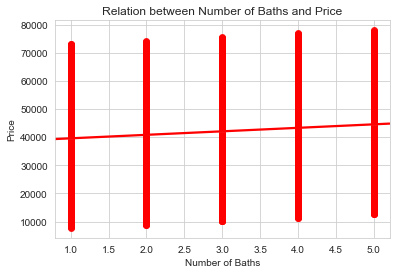

In [9]:
sns.regplot(x='Baths', y='Prices', data=dataset, color='red')

plt.xlabel("Number of Baths")
plt.ylabel("Price")
plt.title("Relation between Number of Baths and Price")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


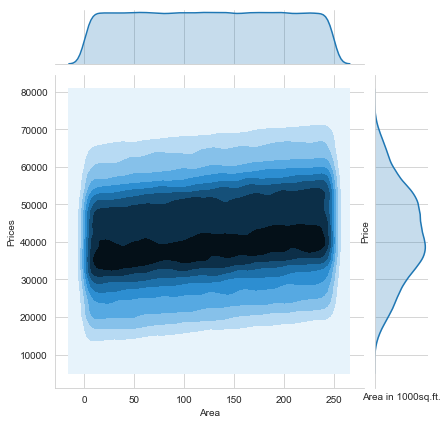

In [11]:
sns.jointplot(x="Area", y="Prices", data=dataset, kind='kde', joint_kws={'color':'green'})
#plt.title("Relation between Area and Price")
plt.xlabel("Area in 1000sq.ft.")
plt.ylabel("Price")
plt.show()

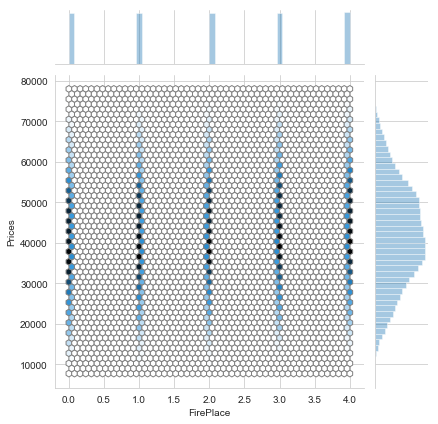

In [12]:
sns.jointplot(x="FirePlace", y="Prices", data=dataset, kind='hex', joint_kws={'color':'grey'})
#plt.xlabel("Number of Fire place")
#plt.ylabel("Price")
#plt.title("Relation between the number of fireplace and Price")
#plt.show()

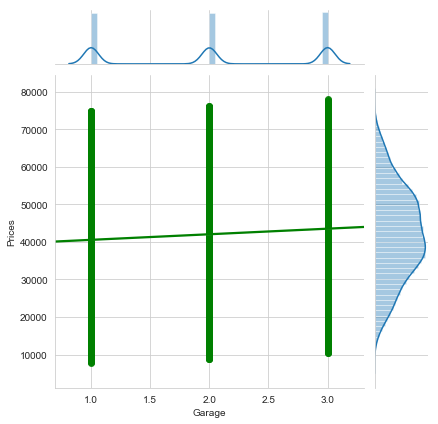

In [13]:
sns.jointplot(x="Garage", y="Prices", data=dataset, kind='reg', joint_kws={'color':'green'})
#sns.plt.show()

In [14]:
dataset.pivot_table(values='Prices', index='Fiber')

,Prices
Fiber,
0,36175.717672
1,47913.574394


In [15]:
pd.crosstab(dataset['Floors'], dataset['Baths'])

Baths,1,2,3,4,5
Floors,,,,,
0,50050,50129,50142,49914,50072
1,50269,49665,50016,50075,49668


In [16]:
# Splitting the independent variables and target variable from the original dataset
X = dataset.drop(['Prices'],axis=1)
y = dataset.Prices


### Standardization

In [17]:
# Reason to Scale the Variables.
# Price Attribute ranges from 7000 to 70,000, and Area varies between 100 and 200.
# Rest of the attributes were very small value. So applied Standard Scaling on both X and y. 

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_Scaled=pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

sc_y=StandardScaler()
y = np.array(y).reshape(-1,1)
y_Scaled = sc_y.fit_transform(y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
## Recursive Feature Elimination
list_r2=[]
list_adj_r2=[]
max_r2=0
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
estimator=LinearRegression()
for i in range(1, len(X.iloc[0])+1):
    selector=RFE(estimator, i, step=1)
    selector=selector.fit(X_Scaled,y_Scaled)
    r2=selector.score(X_Scaled,y_Scaled)
    Adj_r2=1-(len(X)-1)/(len(X)-i-1)*(1-r2)
    list_adj_r2.append(Adj_r2)
    list_r2.append(r2)
    if max_r2<Adj_r2:
        sel_features=selector.support_
        max_r2=Adj_r2
        
X_sub=X_Scaled.iloc[:,sel_features]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

## Recursive Feature Elimination

- Removed attributes with weaker linear correlation with the Target variable.
    - Original X had 15 Attributes and RFE generated X has only 13 variables.
    - Garden and Swimming pool are removed.
- Condition provided in RFE is to remove the attributes whose Adjusted R-square values are less than zero.

In [19]:
print("The new dataframe with weak attributes removed:\n",X_sub)

The new dataframe with weak attributes removed:
             Area    Garage  FirePlace     Baths  White Marble  Black Marble  \
0       0.544192 -0.001579  -1.416811 -0.705739     -0.706564      1.416263   
1      -0.570087 -0.001579  -1.416811  0.708463     -0.706564     -0.706083   
2       0.906333 -0.001579   1.412005  0.708463      1.415300     -0.706083   
3      -0.695443 -0.001579   1.412005  0.708463     -0.706564     -0.706083   
4       0.321336 -1.225562   1.412005 -0.705739      1.415300     -0.706083   
5      -0.012947  1.222405   0.704801  0.001362     -0.706564      1.416263   
6      -0.932228 -1.225562  -1.416811 -0.705739     -0.706564     -0.706083   
7       1.728114 -0.001579  -0.709607 -1.412840      1.415300     -0.706083   
8       1.644543 -1.225562  -1.416811 -0.705739     -0.706564     -0.706083   
9       1.630615 -1.225562  -0.002403  0.708463     -0.706564     -0.706083   
10     -0.890442 -0.001579   1.412005  1.415563     -0.706564     -0.706083   
11 

In [20]:
print("R-Square Values generated during RFE", list_r2)
print("Adjusted R-Square Values generated during RFE", list_adj_r2)

R-Square Values generated during RFE [0.3837193505957808, 0.6177580980396251, 0.8188070158510716, 0.8741999375640246, 0.9025858757044811, 0.9361113099210129, 0.958042338143706, 0.958042338143706, 0.9792727168225891, 0.98954757941113, 0.997227948733788, 0.9998934619693551, 1.0, 1.0, 1.0]
Adjusted R-Square Values generated during RFE [0.3837181180295517, 0.6177565690628434, 0.8188059286844693, 0.874198931153461, 0.9025849015515484, 0.9361105432459985, 0.9580417507270413, 0.9580416668090322, 0.9792723437240299, 0.9895473703581191, 0.9972278877471964, 0.999893459412376, 1.0, 1.0, 1.0]


## Reason for weaker correlation:
### Swimming Pool:
- A Pool Can Increase Insurance Costs. 
- In some areas, adding a pool may increase your annual property taxes, but it won't necessarily add to your home's selling price.
- Average cost to install, equip, and fill a 600-square-foot concrete pool starts at CAD 30,000.
- Need to enclose the pool with a fence — a requirement in most states.
- Several ongoing costs:
    — The pump and heater could drive up your utility costs by CAD 100 a month or so.
    — Houselogic suggests you hire a professional to open and close your pool for the season. That’ll cost CAD 500 per visit.
    — You’ll spend about CAD 600 during the swimming season on chemicals if you maintain your pool yourself.
    
### Garden:
- Extra maintenance cost and extra work involved.
- People like having plenty of outdoor space, they don't always relish a garden that requires high maintenance.

## Datamining Analysis
### Factors majorly affecting the house prices are:
- Floors
    - Supply & Demand. Supply of house is less, but demand is high. So houses with more than one level storey are more preferred, providing more move-in spaces.
- Fiber
    - Location is more concerned, because everyone are using mobile internet. So a location with availability of good signal strength is preferred.
- White Marble 
    - Unique
    - In demand - Elegant appearance
    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


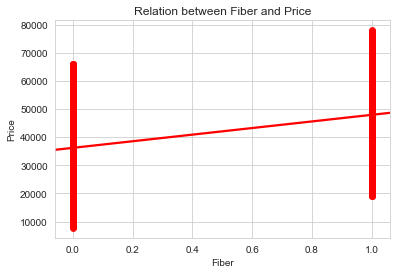

In [21]:
sns.regplot(x='Fiber', y='Prices', data=dataset, color='red')
plt.xlabel("Fiber")
plt.ylabel("Price")
plt.title("Relation between Fiber and Price")
plt.show()

### Factors decreasing the house prices are:
- Black Marbles
    - Dark
    - Seems to be smaller than actual
- Indian Marbles
    - Expensive
    - Gets more chilled
    - Maintenance cost is very high

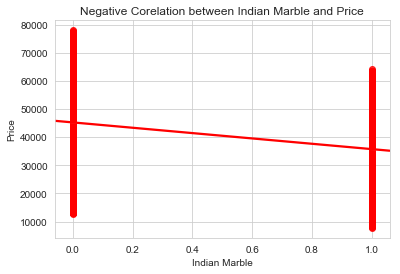

In [22]:
sns.regplot(x='Indian Marble', y='Prices', data=dataset, color='red')
plt.xlabel("Indian Marble")
plt.ylabel("Price")
plt.title("Negative Corelation between Indian Marble and Price")
plt.show()

In [23]:
# Splitting the data for training and testing phases.
# Since my dataset is very huge. I splitted the 50% of data for training and 50% for testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub,y_Scaled, test_size=0.5, random_state=0)


## Linear Regression

- Linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. ... For more than one independent variable, the process is called multiple linear regression.



In [24]:
# Importing Linear Regression Model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

# Training my model
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print("Regression Score:", LR.score(X_test,y_test))
b0=LR.intercept_
b1=LR.coef_
print("b0 is:", b0)
print("b1 is:", b1)


Regression Score: 1.0
b0 is: [1.86265933e-16]
b1 is: [[ 0.14821213  0.10119603  0.08757182  0.14597434 -0.51111221 -0.86116204
  -1.05698686  0.6193109   0.23589381  0.01032182  0.05160924  0.48512702
   0.18372903]]


# Ordinary Least Squares:

In [25]:
# Using OLS summary to find my p-values. Finding summary after removing the attributes using RFE.
import statsmodels.api as sm
X2=sm.add_constant(X_sub)
ols=sm.OLS(y_Scaled,X2)
lr=ols.fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.381e+34
Date:                Thu, 13 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:49:11   Log-Likelihood:             1.6735e+07
No. Observations:              500000   AIC:                        -3.347e+07
Df Residuals:                  499987   BIC:                        -3.347e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.931e-16   9.97e-19    193.620

In [26]:
# Mean Square Errors and R-Square values
# MSE=SSE/(n-2)
from sklearn.metrics import mean_squared_error,r2_score
print("MSE is", mean_squared_error(y_pred,y_test))
print("R-Square is", r2_score(y_test,y_pred))


MSE is 9.402465455472011e-30
R-Square is 1.0


## K-Fold Cross-Validation

In [27]:
#Splitting my X and y into k-folds
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
kf.get_n_splits(X_sub)
kf.get_n_splits(y_Scaled)
print(kf)

y_Scaled=pd.DataFrame(y_Scaled)
for train_index, test_index in kf.split(dataset):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_sub.iloc[train_index], X_sub.iloc[test_index]
    y_train, y_test = y_Scaled.iloc[train_index], y_Scaled.iloc[test_index]


KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 50000  50001  50002 ... 499997 499998 499999] TEST: [    0     1     2 ... 49997 49998 49999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [50000 50001 50002 ... 99997 99998 99999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [100000 100001 100002 ... 149997 149998 149999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [150000 150001 150002 ... 199997 199998 199999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [200000 200001 200002 ... 249997 249998 249999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [250000 250001 250002 ... 299997 299998 299999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [300000 300001 300002 ... 349997 349998 349999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [350000 350001 350002 ... 399997 399998 399999]
TRAIN: [     0      1      2 ... 499997 499998 499999] TEST: [400000 400001 400002 ... 

In [28]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
regr=LinearRegression()
shuffle=KFold(n_splits=10, shuffle=True, random_state=0)
Regr_scores=cross_val_score(regr, X_sub,y_Scaled, cv=shuffle)
print ("R-Square values across the k-folds are:", Regr_scores)
print ("The mean of R-Square values across the k-folds:", Regr_scores.mean())


R-Square values across the k-folds are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The mean of R-Square values across the k-folds: 1.0


# Multiple Linear Regression model applied on Housing Prices Dataset!!!